<a href="https://colab.research.google.com/github/RutikaChougule/Books-Python/blob/main/TaxifareAmmountCapProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
df_train=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

df_test=pd.read_csv('/content/test.csv')


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [45]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [46]:
df_train.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [47]:
df_train.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [48]:
train_Y = np.array(df_train['amount'])
ids = df_test['key']

df_train = df_train.drop(['unique_id', 'amount'] , axis=1)
df_test = df_test.drop(['key'] , axis=1)
df = pd.concat([df_train,df_test])

df.head()

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,NaN,NaN,NaN,NaN,NaN,NaN


TEST DATA

pickup_datetime    
pickup_longitude  
pickup_latitude    
dropoff_longitude  
dropoff_latitude   
passenger_count  

Train Data
 unique_id 
 1   amount           
 2   date_time_of_pickup  
 3   longitude_of_pickup   
 4   latitude_of_pickup    
 5   longitude_of_dropoff  
 6   latitude_of_dropoff   
 7   no_of_passenger   

In [49]:
df_train['diff_lat'] = (df_train['latitude_of_dropoff'] - df_train['latitude_of_pickup']).abs()
df_train['diff_long'] = (df_train['longitude_of_dropoff'] - df_train['longitude_of_pickup'] ).abs()

df_test['diff_lat'] = (df_test['dropoff_latitude'] - df_test['pickup_latitude']).abs()
df_test['diff_long'] = (df_test['dropoff_longitude'] - df_test['pickup_longitude'] ).abs()

In [50]:
df_train.head()

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,diff_lat,diff_long
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009041,0.002701
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.070701,0.036780
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.010708,0.008504
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.024949,0.004437
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.015754,0.011440


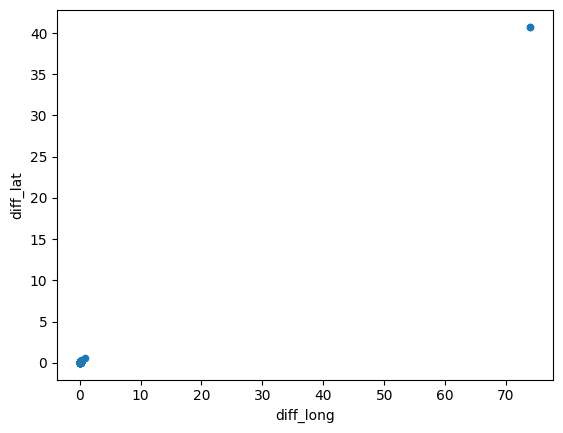

In [51]:
plot=df_train.iloc[:2000].plot.scatter('diff_long','diff_lat')

date_time_of_pickup

longitude_of_pickup

 latitude_of_pickup

longitude_of_dropoff

latitude_of_dropoff

In [60]:
df['distance_2D'] = (
    (df['longitude_of_dropoff'] - df['longitude_of_pickup']) ** 2 + \
    (df['latitude_of_dropoff'] - df['latitude_of_pickup']) ** 2) ** 0.5


df = df.drop(['longitude_of_pickup', 
              'latitude_of_pickup', 
              'longitude_of_dropoff', 
              'latitude_of_dropoff', 
              'date_time_of_pickup'
              ], axis=1)
              
df.head()

,no_of_passenger,passenger_count,distance_2D
0,1.0,-1.0,0.009436
1,1.0,-1.0,0.079696
2,2.0,-1.0,0.013674
3,1.0,-1.0,0.025340
4,1.0,-1.0,0.019470


In [78]:
df['no_of_passenger']=df['no_of_passenger'].fillna(-1)
df['distance_2D']=df['distance_2D'].fillna(-1)

In [71]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]
reg = GradientBoostingRegressor()
reg.fit(train_X, train_Y)
pred=reg.predict(test_X)

In [101]:
pred=np.array(pred)
sub=pd.DataFrame({'id':ids,'Fare_ammount':pred})
sub.head()

,id,Fare_ammount
0,2015-01-27 13:08:24.0000002,7.787616
1,2015-01-27 13:08:24.0000003,7.787616
2,2011-10-08 11:53:44.0000002,7.787616
3,2012-12-01 21:12:12.0000002,7.787616
4,2012-12-01 21:12:12.0000003,7.787616


In [91]:
sub.to_csv('/content/Final.csv',index=False)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [103]:
df_data=pd.read_csv('/content/Final.csv')
df_data.head()

,unique_id,ammount
0,2015-01-27 13:08:24.0000002,7.787616
1,2015-01-27 13:08:24.0000003,7.787616
2,2011-10-08 11:53:44.0000002,7.787616
3,2012-12-01 21:12:12.0000002,7.787616
4,2012-12-01 21:12:12.0000003,7.787616
